In [8]:
import numpy as np
import pandas as pd
from causalimpact import CausalImpact
from matplotlib import pyplot as plt

In [9]:
df= pd.read_csv("all.csv")

In [10]:
df.tail()

,Date,Adj_Close,Volume,Oil_price,Adj_Close_SP
2510,2019-04-23,374.019989,4894500,66.30,2933.679932
2511,2019-04-24,375.459991,9855100,65.89,2927.250000
2512,2019-04-25,382.799988,6615000,65.21,2926.169922
2513,2019-04-26,380.790009,4259600,63.30,2939.879883
2514,2019-04-29,379.049988,5452800,63.50,2943.030029


In [11]:
df['Date']=pd.to_datetime(df["Date"])
df=df.set_index(df.Date)
df=df.drop("Date",axis=1)


In [12]:
event_1='2018-10-29'
event_2='2019-03-10'

C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    334.1              13029.8
Prediction (s.d.)         346.0 (4.1)        13493.8 (159.4)
95% CI                    [337.7, 353.7]     [13171.2, 13796.0]

Absolute effect (s.d.)    -11.9 (4.1)        -464.0 (159.4)
95% CI                    [-19.6, -3.6]      [-766.2, -141.4]

Relative effect (s.d.)    -3.4% (1.2%)       -3.4% (1.2%)
95% CI                    [-5.7%, -1.0%]     [-5.7%, -1.0%]

Posterior tail-area probability p: 0.002
Posterior prob. of a causal effect: 99.80%

For more details run the command: print(impact.summary('report'))


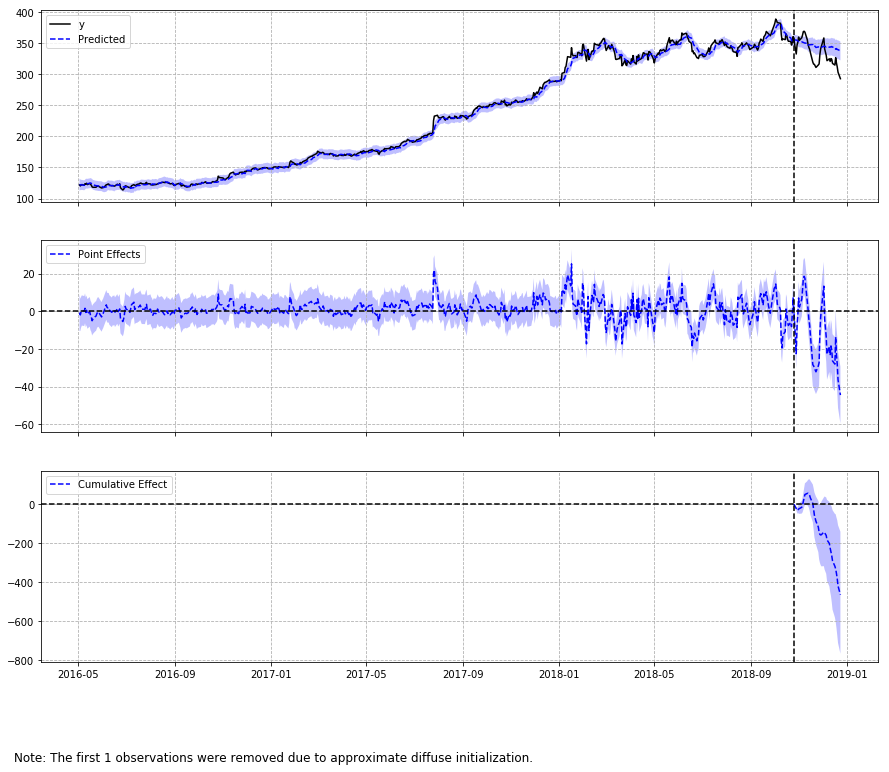

In [21]:
#after event_1 up to end of year
X= df.Oil_price
y= df.Adj_Close
data = pd.DataFrame({'y': y, 'X': X}, columns=['y', 'X'])
pre_period = ['2016-05-02', '2018-10-26']
post_period = ['2018-10-29', '2018-12-24']
ci = CausalImpact(data, pre_period, post_period)
print(ci.summary())
ci.plot()

C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Acer\Anaconda2\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    377.9              13227.7
Prediction (s.d.)         433.3 (4.6)        15166.3 (160.2)
95% CI                    [424.2, 442.1]     [14845.5, 15473.6]

Absolute effect (s.d.)    -55.4 (4.6)        -1938.6 (160.2)
95% CI                    [-64.2, -46.2]     [-2245.9, -1617.8]

Relative effect (s.d.)    -12.8% (1.1%)      -12.8% (1.1%)
95% CI                    [-14.8%, -10.7%]   [-14.8%, -10.7%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.00%

For more details run the command: print(impact.summary('report'))


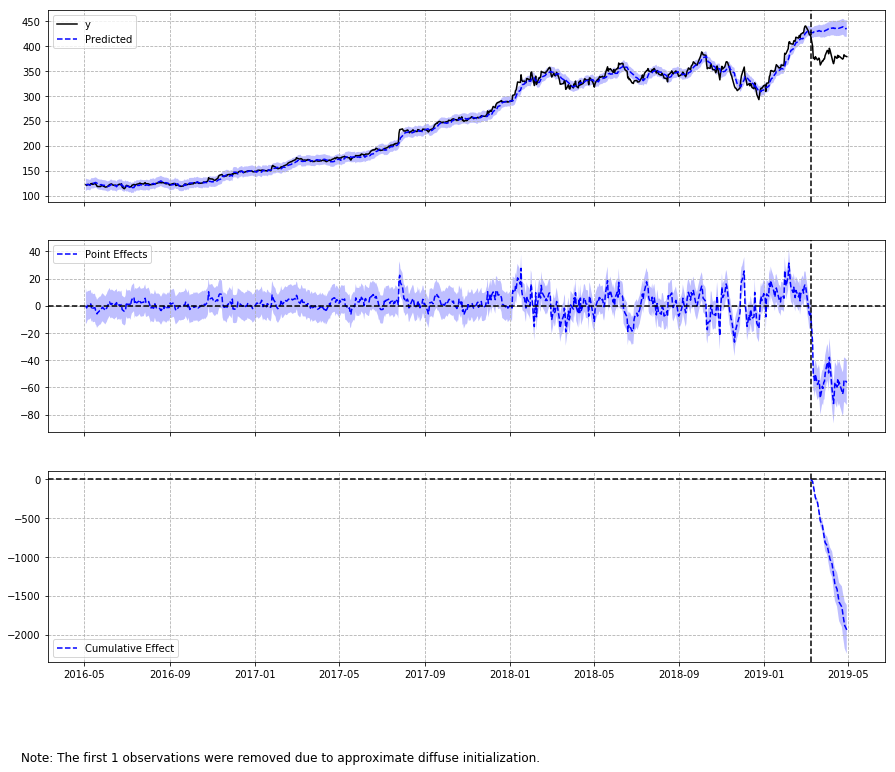

In [22]:
# after event_2 up to end of period
X= df.Oil_price
y= df.Adj_Close
data = pd.DataFrame({'y': y, 'X': X}, columns=['y', 'X'])
pre_period = ['2016-05-02', '2019-03-08']
post_period = ['2019-03-11', '2019-04-29']
ci = CausalImpact(data, pre_period, post_period)
print(ci.summary())
ci.plot()
